# Tutorial 3 - ARMA

### Load packages

In [1]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA

### Set up seaborn parameters for plotting

In [2]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

### Load Data

In [3]:
df = pd.read_csv("AuQuGDP.csv")

In [4]:
df.head()

,Unnamed: 0,Time,AuGDP,quarter,year,t
0,0,1/01/1960,6.468300e+10,1,1960,1/01/1960
1,1,1/04/1960,6.647300e+10,2,1960,1/04/1960
2,2,1/07/1960,6.662300e+10,3,1960,1/07/1960
3,3,1/10/1960,6.649000e+10,4,1960,1/10/1960
4,4,1/01/1961,6.669000e+10,1,1961,1/01/1961


### Set time index

In [5]:
df['date'] = pd.to_datetime(df['Time'])
df = df.set_index('date')
df.drop(['Time'], axis = 1, inplace = True)
df.head()

,Unnamed: 0,AuGDP,quarter,year,t
date,,,,,
1960-01-01,0,6.468300e+10,1,1960,1/01/1960
1960-01-04,1,6.647300e+10,2,1960,1/04/1960
1960-01-07,2,6.662300e+10,3,1960,1/07/1960
1960-01-10,3,6.649000e+10,4,1960,1/10/1960
1961-01-01,4,6.669000e+10,1,1961,1/01/1961


### (a). graph of GDP & ADF Test

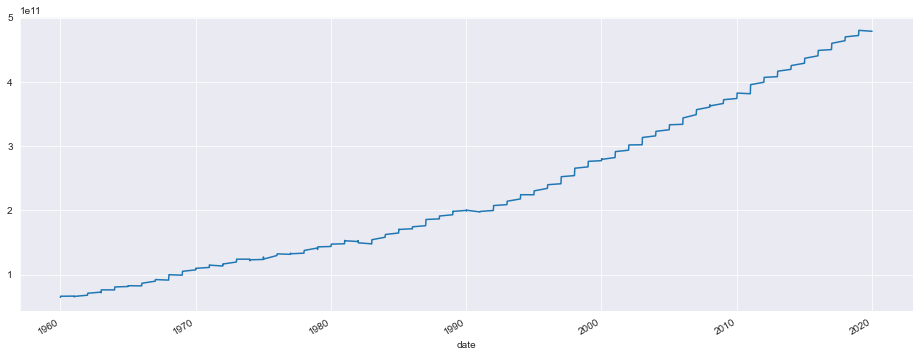

In [8]:
df['AuGDP'].plot()
plt.show()

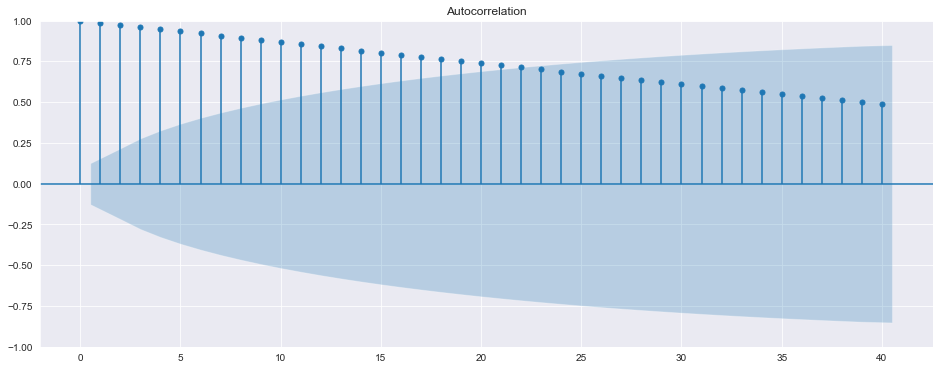

In [9]:
### we can verify the stationarity of the series we can plot the ACF figure
sm.graphics.tsa.plot_acf(df['AuGDP'].values.squeeze(),lags=40)
plt.show()

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


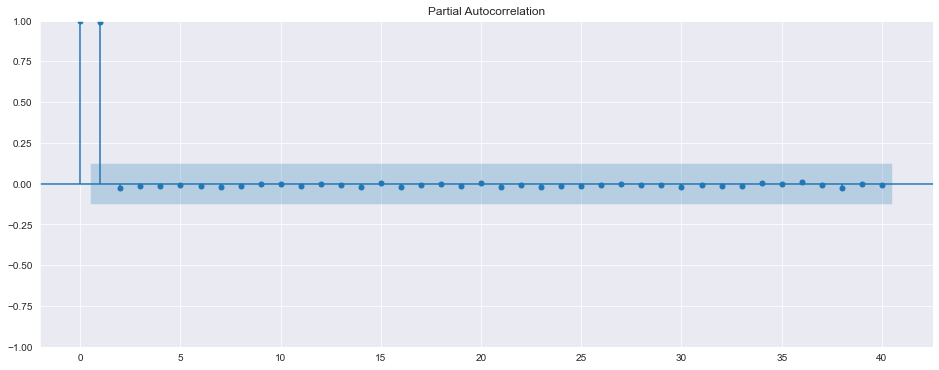

In [10]:
sm.graphics.tsa.plot_pacf(df['AuGDP'].values.squeeze(),lags=40)
plt.show()

In [13]:
### we can run the Augmented Dickey-Fuller test (ADF)
X = df['AuGDP'].values
result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
#result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}


### (b). First Difference Graph and ADF

In [16]:
df2 = df
df2['GDP_D1'] = df2['AuGDP'].diff()
df2 = df2.dropna(axis = 0)

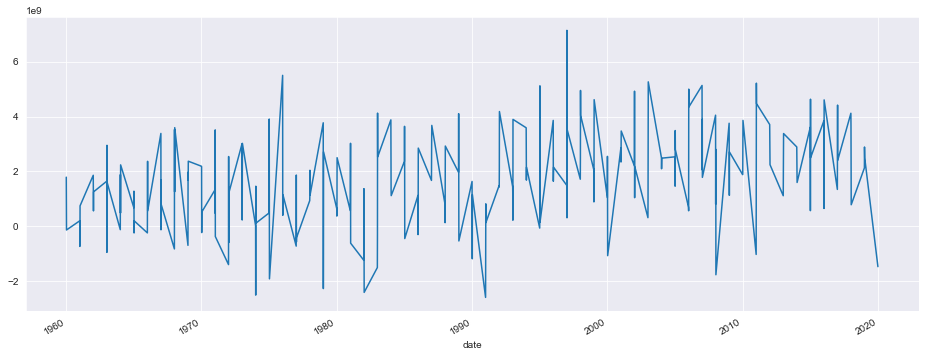

In [17]:
df2['GDP_D1'].plot()
plt.show()

In [18]:
### ADF
X2 = df2['GDP_D1'].values
result2=adfuller(X2,regression='ct',maxlag=3,regresults=True,store=True)
#result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


### (c). ACF and PACF plots for GDP_D1

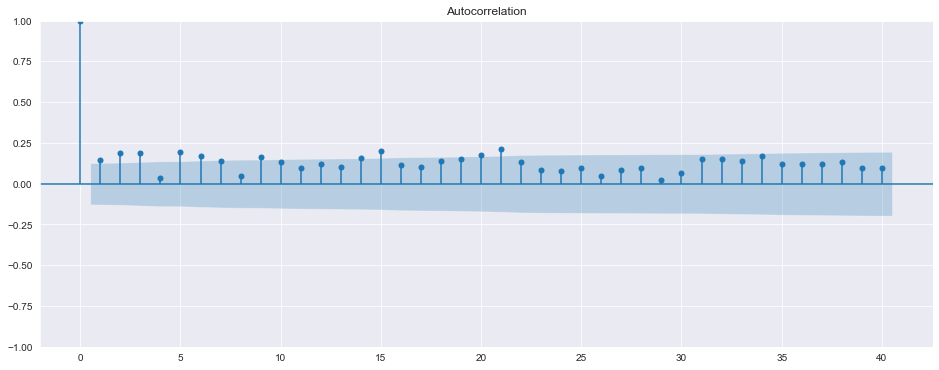

In [21]:
sm.graphics.tsa.plot_acf(df2['GDP_D1'].values.squeeze(), lags=40)
plt.show()

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


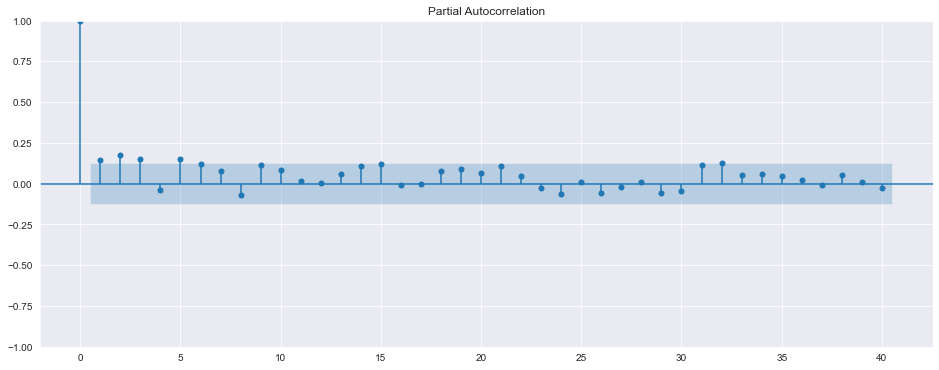

In [20]:
sm.graphics.tsa.plot_pacf(df2['GDP_D1'].values.squeeze(), lags=40)
plt.show()

### (d). Modeling and predicting AR(p)

In [30]:
mod_AR = ARIMA(df2['GDP_D1'][df2.index.year<=2018], order=(5,0,0))
res_AR = mod_AR.fit()
print(res_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                 GDP_D1   No. Observations:                  235
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -5319.911
Date:                Fri, 26 Aug 2022   AIC                          10653.822
Time:                        10:03:42   BIC                          10678.040
Sample:                             0   HQIC                         10663.586
                                - 235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+09   6.08e-12   2.84e+20      0.000    1.73e+09    1.73e+09
ar.L1          0.1059      0.060      1.767      0.077      -0.012       0.223
ar.L2          0.1458      0.066      2.194      0.0

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


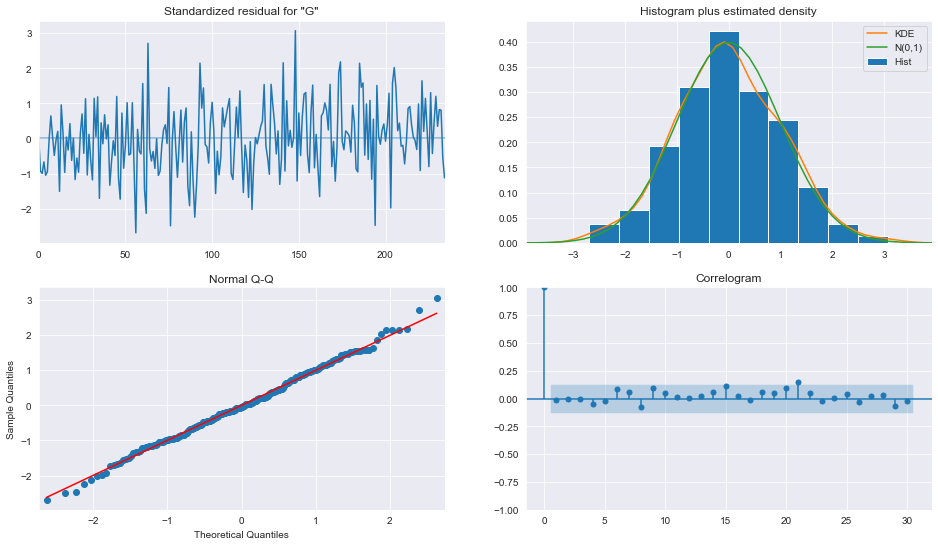

In [31]:
fig = plt.figure(figsize =(16,9))
fig = res_AR.plot_diagnostics(fig=fig, lags = 30)

### (e). j-period ahead forecasts AR(p)

In [32]:
res_AR.forecast(steps=1)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


235    1.811564e+09
dtype: float64

In [33]:
res_AR.forecast(steps = 4)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


235    1.811564e+09
236    1.782159e+09
237    1.891437e+09
238    1.782372e+09
Name: predicted_mean, dtype: float64

### (f). MA(q) modeling.

In [27]:
mod_MA = ARIMA(df2['GDP_D1'][df2.index.year<=2018], order=(0,0,6))
res_MA = mod_MA.fit()
print(res_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                 GDP_D1   No. Observations:                  235
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -5319.038
Date:                Fri, 26 Aug 2022   AIC                          10654.076
Time:                        10:02:15   BIC                          10681.753
Sample:                             0   HQIC                         10665.234
                                - 235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+09   6.68e-12   2.58e+20      0.000    1.73e+09    1.73e+09
ma.L1          0.0879      0.067      1.308      0.191      -0.044       0.220
ma.L2          0.1718      0.072      2.390      0.0

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


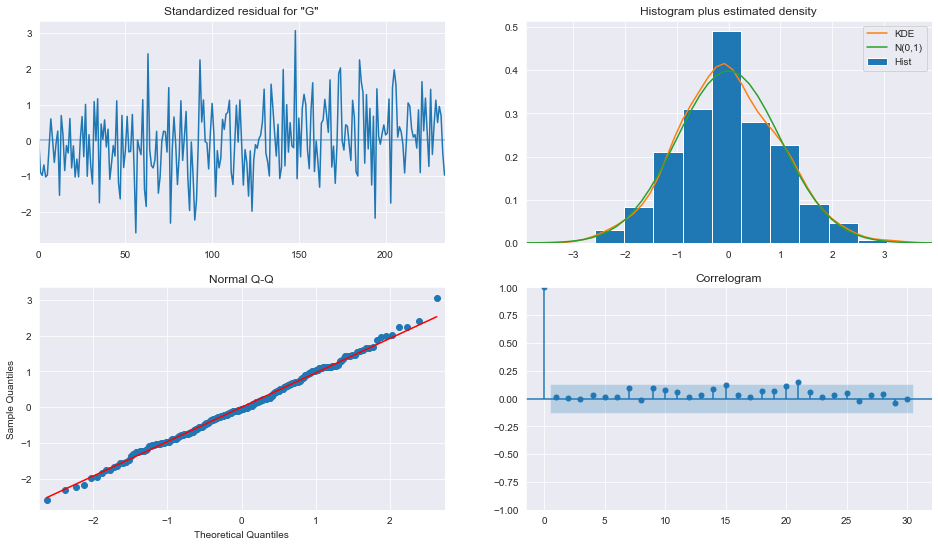

In [28]:
fig = plt.figure(figsize =(16,9))
fig = res_MA.plot_diagnostics(fig=fig, lags = 30)

### (g). j-period ahead forecasts MA(q)

In [34]:
res_MA.forecast(steps = 1)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


235    1.884415e+09
dtype: float64

In [35]:
res_MA.forecast(steps = 4)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


235    1.884415e+09
236    1.559540e+09
237    1.864562e+09
238    1.937100e+09
Name: predicted_mean, dtype: float64